# **DATA ANALYSIS PROJECT: AIR QUALITY INDEX (AQI) IN SHUNYI DISTRICT**

# ANALYSIS QUESTION
1. Bagaimana tren indeks kualitas udara (AQI) di wilayah Shunyi sepanjang tahun 2013-2017? Adakah perubahan signifikan pada waktu tertentu?
2. Bagaimana pola kualitas udara berubah berdasarkan musim, dan kelompok musim apa yang menunjukkan nilai AQI tertinggi dan terendah?
3. Bagaimana distribusi nilai AQI di wilayah Shunyi berdasarkan kategori kualitas udara?

# IMPORT LIBRARY

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# DATA WRANGLING

## DATA GATHERING

In [66]:
# loading dataset
aqi_shunyi = pd.read_csv("./data/PRSA_Data_Shunyi_20130301-20170228.csv")
aqi_shunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


## DATA ASSESSING

In [67]:
# menilai data AQI
aqi_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [68]:
# cek parameter statistik deskriptif
aqi_shunyi.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [69]:
# cek missing value
aqi_shunyi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [70]:
# cek duplikasi data
print("Duplicates: ", aqi_shunyi.duplicated().sum())

Duplicates:  0


## DATA CLEANING

In [71]:
# menangani missing value dengan interpolasi
aqi_shunyi['PM2.5'] = aqi_shunyi['PM2.5'].interpolate(method='linear')
aqi_shunyi['PM10'] = aqi_shunyi['PM10'].interpolate(method='linear')
aqi_shunyi['SO2'] = aqi_shunyi['SO2'].interpolate(method='linear')
aqi_shunyi['NO2'] = aqi_shunyi['NO2'].interpolate(method='linear')
aqi_shunyi['CO'] = aqi_shunyi['CO'].interpolate(method='linear')
aqi_shunyi['O3'] = aqi_shunyi['O3'].interpolate(method='linear')

# menangani missing value dengan mean
aqi_shunyi['TEMP'] = aqi_shunyi['TEMP'].fillna(aqi_shunyi['TEMP'].mean())
aqi_shunyi['PRES'] = aqi_shunyi['PRES'].fillna(aqi_shunyi['PRES'].mean())
aqi_shunyi['DEWP'] = aqi_shunyi['DEWP'].fillna(aqi_shunyi['DEWP'].mean())
aqi_shunyi['RAIN'] = aqi_shunyi['RAIN'].fillna(aqi_shunyi['RAIN'].mean())
aqi_shunyi['WSPM'] = aqi_shunyi['WSPM'].fillna(aqi_shunyi['WSPM'].mean())

# menangani missing value dengan nilai dominan
dominant_value = aqi_shunyi['wd'].mode()[0] 
aqi_shunyi['wd'] = aqi_shunyi['wd'].fillna(dominant_value)

In [72]:
# validasi penanganan missing value
aqi_shunyi.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [73]:
# cek parameter statistik keseluruhan
aqi_shunyi.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.387969,1013.061938,2.465036,0.061094,NaN,1.807533,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.475233,10.169935,13.716048,0.761114,NaN,1.287009,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


# EXPLORATORY DATA ANALYSIS

## TREN AQI SEPANJANG TAHUN 2013-2017

In [74]:
# mengubah kolom year, month, day menjadi kolom datetime
aqi_shunyi['datetime'] = pd.to_datetime(aqi_shunyi[['year', 'month', 'day']])
aqi_shunyi.set_index('datetime', inplace=True)

In [75]:
# rata-rata AQI per tahun, dikelompokkan berdasarkan tahun
annual_aqi = aqi_shunyi.groupby('year')['PM2.5'].mean().reset_index()
annual_aqi.head()

,year,PM2.5
0,2013,75.746460
1,2014,85.190993
2,2015,81.456119
3,2016,72.223588
4,2017,95.261299


In [76]:
# rata-rata AQI per hari, dikelompokkan berdasarkan tahun
daily_aqi = aqi_shunyi['PM2.5']
daily_aqi.head()

datetime
2013-03-01     3.0
2013-03-01    12.0
2013-03-01    14.0
2013-03-01    12.0
2013-03-01    12.0
Name: PM2.5, dtype: float64

## POLA AQI BERDASARKAN MUSIM

Mendefinisikan pembagian musim di China:
- Spring: Maret (3), April (4), Mei (5)
- Summer: Juni (6), Juli (7), Agustus (8)
- Autumn: September (9), Oktober (10), November (11)
- Winter: Desember (12), Januari (1), Februari (2)

In [77]:
# menambah kolom season berdasarkan bulan
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

aqi_shunyi['season'] = aqi_shunyi['month'].apply(get_season)

In [78]:
# kelompokkan data berdasarkan musim dan hitung rata-rata AQI
seasonal_aqi = aqi_shunyi.groupby('season')['PM2.5'].mean().sort_values()
seasonal_aqi.head()

season
Summer    64.829880
Spring    78.615387
Autumn    79.345948
Winter    95.260607
Name: PM2.5, dtype: float64

In [79]:
# rata-rata AQI per bulan, dikelompokkan berdasarkan tahun
monthly_aqi = aqi_shunyi.groupby(['year', 'month'])['PM2.5'].mean().reset_index()
monthly_aqi_pivot = monthly_aqi.pivot(index='month', columns='year', values='PM2.5')
monthly_aqi.head()

years = monthly_aqi['year'].unique()

## DISTRIBUSI AQI BERDASARKAN KATEGORI KUALITAS UDARA

Mendefinisikan kategori kualitas udara berdasarkan  nilai AQI:
- Good: 0–50
- Moderate: 51–100
- Unhealthy for Sensitive Groups: 101–150
- Unhealthy: 151–200
- Very Unhealthy: 201–300
- Hazardous: >300

Menggunakan Teknik Binning:

Teknik binning dalam proyek ini membantu mengubah data numerik PM2.5 menjadi kategori yang lebih bermakna, sesuai dengan standar kualitas udara. Hal ini mempermudah interpretasi, analisis, dan komunikasi hasil kepada pengguna yang mungkin tidak terbiasa dengan nilai numerik mentah.

In [80]:
# menentukan kategori AQI berdasarkan binning
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 
          'Unhealthy', 'Very Unhealthy', 'Hazardous']

In [81]:
# menambah kolom kategori berdasarkan binning
aqi_shunyi['aqi_category'] = pd.cut(aqi_shunyi['PM2.5'], bins=bins, labels=labels, right=True)

In [82]:
# menghitung jumlah data untuk setiap kategori
category_counts = aqi_shunyi['aqi_category'].value_counts().sort_index()

# DATA VISUALIZATION & EXPLANATORY ANALYSIS

## TREN AQI SEPANJANG TAHUN 2013-2017

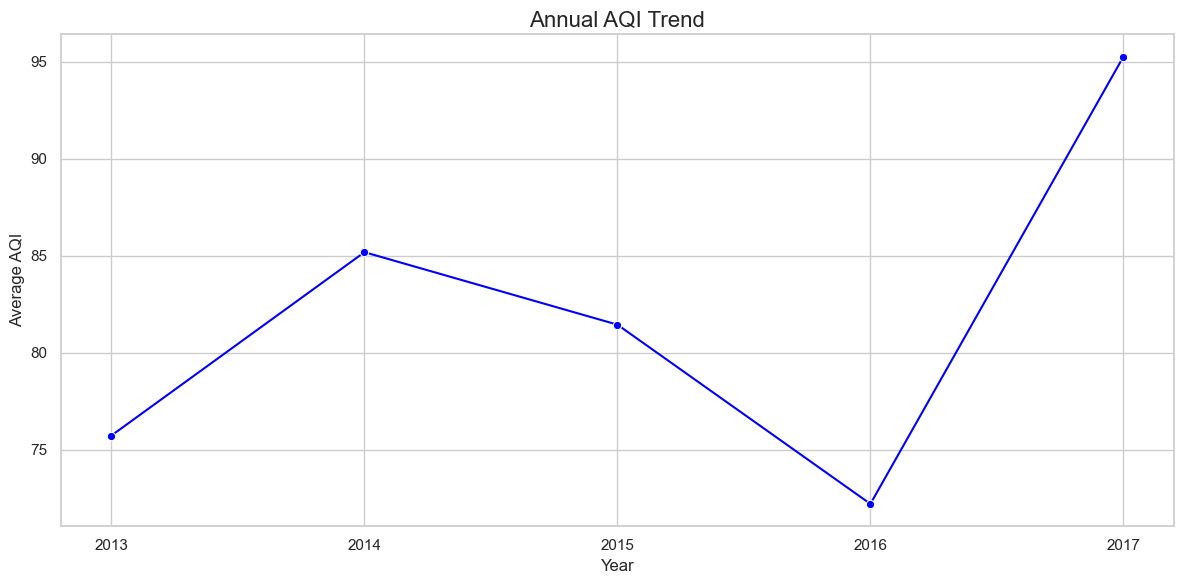

In [83]:
# visualisasi AQI tahunan dengan titik per tahun
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(
    data=annual_aqi,
    x='year',
    y='PM2.5',
    marker='o',
    color='blue'
)

# tambahkan label dan judul
plt.title("Annual AQI Trend", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average AQI", fontsize=12)
plt.xticks(annual_aqi['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik tren tahunan AQI menunjukkan adanya fluktuasi yang cukup tajam di sepanjang 2013 hinga 2017. Dapat dilihat mulai tahun 2014 kualitas udara di wilayah Shunyi sempat mengalami penurunan hingga mencapai titik terendah (terbaik) pada tahun 2016. Kemudian menuju tahun 2017, indeks kualitas udara melonjak drastis hingga mencapai titik rata-rata tertinggi di atas 95. 

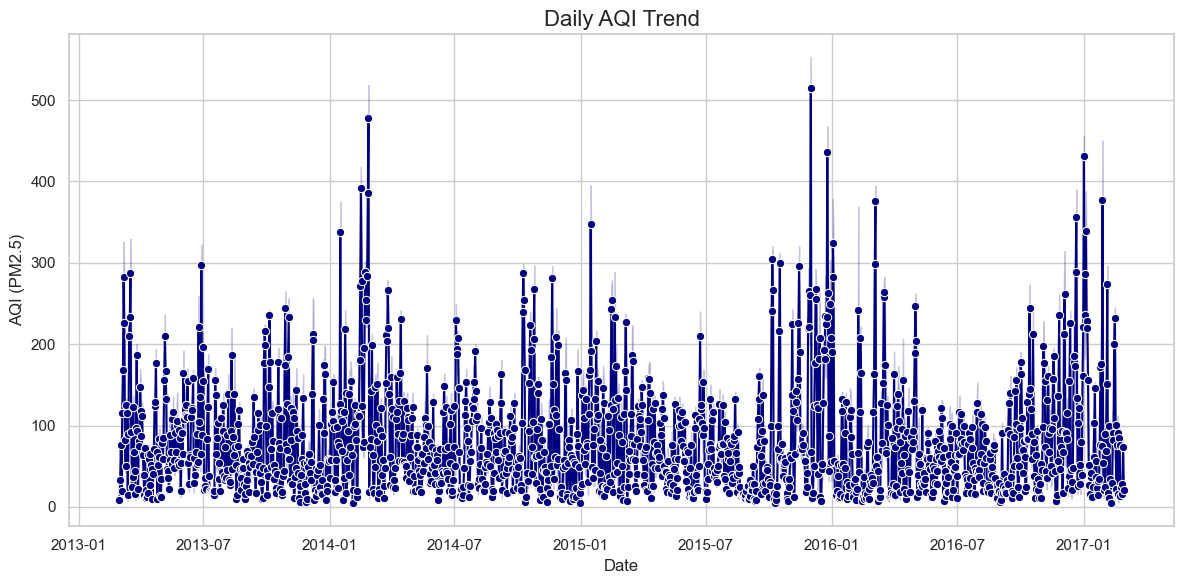

In [84]:
# visualisasi AQI tahunan dengan titik per hari
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(x=daily_aqi.index, y=daily_aqi.values, marker='o', color='navy')

# tambahkan label dan judul
plt.title("Daily AQI Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI (PM2.5)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Lebih jelasnya, jika dilihat berdasarkan grafik harian AQI, indeks kualitas udara di wilayah Shunyi mencapai titik terendah (terbaik) pada akhir tahun 2015. Kemudian puncak indeks tertinggi terjadi pada awal tahun 2016. Selain itu dapat dilihat juga bahwa pada bulan Januari di beberapa tahun (misalnya Januari 2014, Januari 2016, dan Januari 2017) terjadi lonjakan AQI yang cukup tinggi.

## POLA AQI BERDASARKAN MUSIM

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16488\979481846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


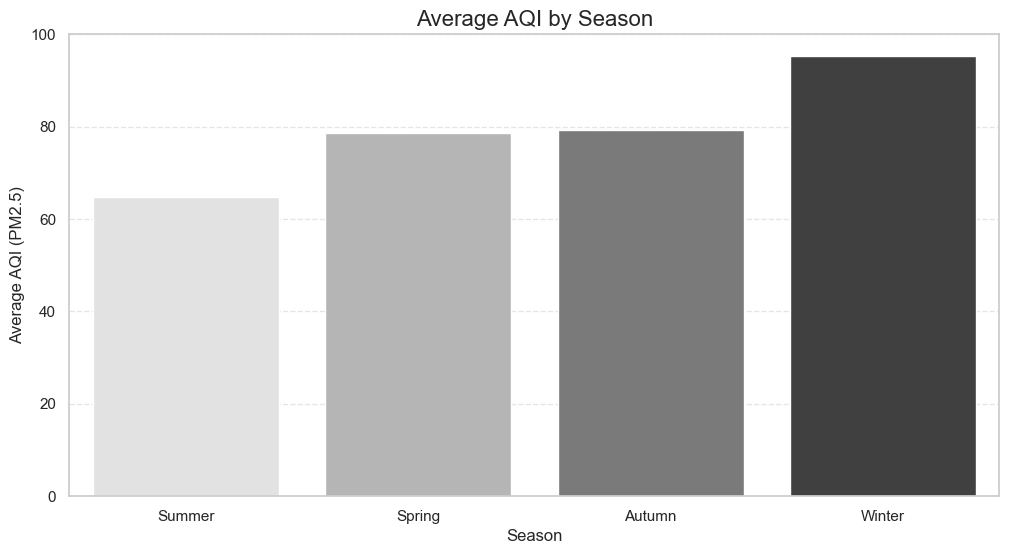

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16488\979481846.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


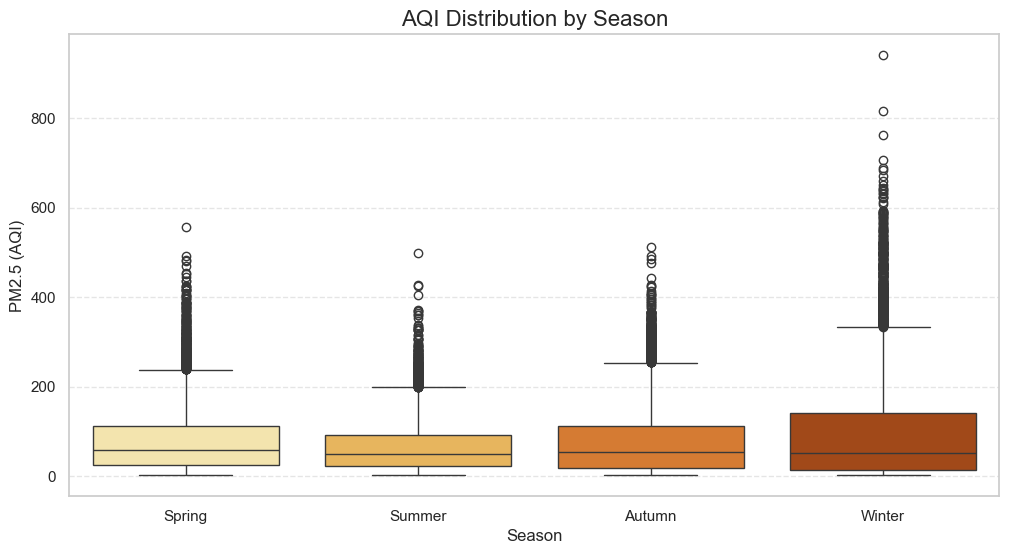

In [85]:
# visualisai rata-rata AQI per musim
palette = sns.color_palette("Greys", n_colors=4)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=seasonal_aqi.index,
    y=seasonal_aqi.values,
    palette=palette
)
plt.title('Average AQI by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average AQI (PM2.5)', fontsize=12)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# visualisasi distribusi AQI per musim
palette = sns.color_palette("YlOrBr", n_colors=4)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='season',
    y='PM2.5',
    data=aqi_shunyi,
    palette=palette
)
plt.title('AQI Distribution by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM2.5 (AQI)', fontsize=12)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Kualitas udara cenderung paling buruk pada musim dingin (winter) karena rata-rata AQI tertinggi dan distribusi AQI yang menunjukkan banyak nilai ekstrem. Sebaliknya, musim panas (summer) menunjukkan kualitas udara yang paling baik. Jika diurutkan, musim dengan kualitas udara terbaik ke terburuk adalah musim panas (summer), musim semi (spring), musim gugur (autum), dan musim dingin (winter).

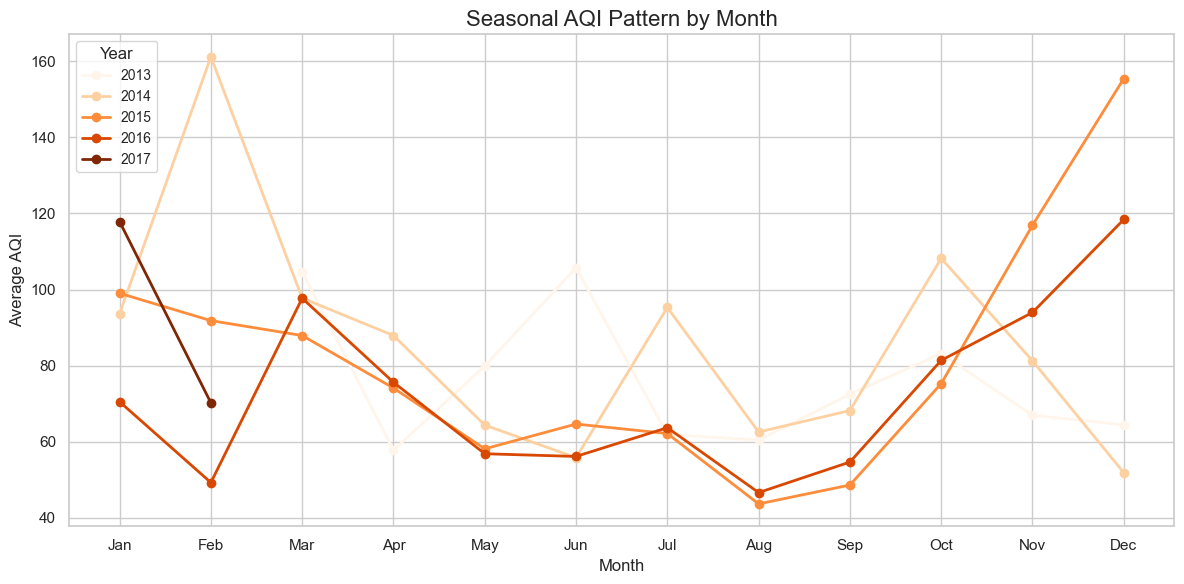

In [86]:
# visualisasi AQI tahunan dengan titik per bulan
plt.figure(figsize=(12, 6))
colors = cm.Oranges(np.linspace(0, 1, len(years)))
for year, color in zip(years, colors):
    plt.plot(monthly_aqi_pivot.index, monthly_aqi_pivot[year], marker='o', label=str(year), color=color, linewidth=2)

# tambahkan label dan judul
plt.title('Seasonal AQI Pattern by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik AQI bulanan ini digunakan untuk memvalidasi temuan sebelumnya. Berdasarkan grafik, puncak peningkatan rata-rata indeks kualitas udara terjadi mendekati musim dingin (Desember-Februari). Kemudian mendekati musim panas (Juni-Agustus) indeks kualitas udara mencapai titik terendah yang berarti kualitas udara membaik sepanjang musim panas.

## DISTRIBUSI AQI BERDASARKAN KATEGORI KUALITAS UDARA

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16488\4265118622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


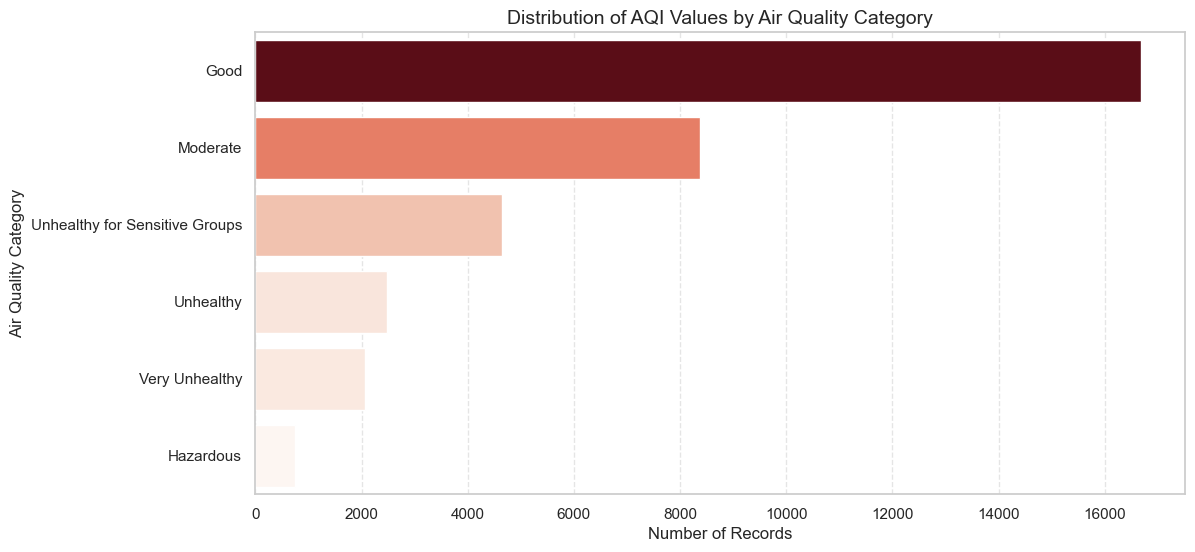

In [87]:
# visualisasi distribusi kategori AQI menggunakan barplot
import matplotlib.cm as cm
from matplotlib.colors import Normalize
norm = Normalize(vmin=min(category_counts.values), vmax=max(category_counts.values))
colors = [cm.Reds(norm(value)) for value in category_counts.values]
plt.figure(figsize=(12, 6))
sns.barplot(
    y=category_counts.index,
    x=category_counts.values,
    palette=colors
)
plt.title("Distribution of AQI Values by Air Quality Category", fontsize=14)
plt.ylabel("Air Quality Category", fontsize=12)
plt.xlabel("Number of Records", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

Distribusi nilai AQI di wilayah Shunyi menunjukkan bahwa kualitas udara sebagian besar berada dalam kategori "Good" dan "Moderate," dengan jumlah catatan tertinggi pada kategori "Good." Kategori seperti "Unhealthy for Sensitive Groups" dan "Unhealthy" lebih jarang terjadi, sementara kualitas udara "Very Unhealthy" dan "Hazardous" sangat jarang ditemukan. Hal ini mengindikasikan bahwa wilayah Shunyi umumnya memiliki kualitas udara yang baik atau sedang.

# CONCLUSION

1. **Bagaimana tren indeks kualitas udara (AQI) di wilayah Shunyi sepanjang tahun 2013-2017? Adakah perubahan signifikan pada waktu tertentu?**

   Tren AQI di Shunyi menunjukkan fluktuasi musiman yang signifikan, indeks kualitas udara akan melonjak naik mendekati bulan Januari di setiap tahun. Peningkatan rata-rata AQI tertinggi terjadi pada tahun 2016, yang merupakan perubahan signifikan setelah terjadi penurunan pada tahun 2014-2015. Hal ini mengindikasikan bahwa Januari 2016 merupakan periode dengan kualitas udara terburuk di sepanjang tahun 2013-2017.

2. **Bagaimana pola kualitas udara berubah berdasarkan musim, dan kelompok musim apa yang menunjukkan nilai AQI tertinggi dan terendah?**

   Pola umum berdasarkan grafik rata-rata AQI dan distribusi AQI menunjukkan bahwa kualitas udara cenderung memburuk dari musim panas menuju ke musim dingin. Nilai AQI tertinggi yang menunjukkan kualitas udara terburuk terjadi selama musim dingin dan nilai AQI terendah yang menunjukkan kualitas udara terbaik terjadi selama musim panas.

3. **Bagaimana distribusi nilai AQI di wilayah Shunyi berdasarkan kategori kualitas udara?**

   Distribusi nilai AQI di wilayah Shunyi menunjukkan bahwa kualitas udara sebagian besar berada dalam kategori "Good" dan "Moderate," dengan jumlah catatan tertinggi pada kategori "Good." Kategori seperti "Unhealthy for Sensitive Groups" dan "Unhealthy" lebih jarang terjadi, sementara kualitas udara "Very Unhealthy" dan "Hazardous" sangat jarang ditemukan.